In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [2]:
df=pd.read_csv('Reviews.csv')
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Rating,Time,Summary,Review
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Rating                  568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Review                  568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [4]:
df=df.drop(columns=['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time','Summary'])

In [5]:
df

,Rating,Review
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...
...,...,...
568449,5,Great for sesame chicken..this is a good if no...
568450,2,I'm disappointed with the flavor. The chocolat...
568451,5,"These stars are small, so you can give 10-15 o..."
568452,5,These are the BEST treats for training and rew...


## Remove null and duplicate rows

In [6]:
df = df.dropna(subset=['Review'])
df = df.dropna(subset=['Rating'])

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
conflicting_reviews = df.groupby('Review')['Rating'].nunique()
conflicting_reviews = conflicting_reviews[conflicting_reviews > 1].index
df = df[df['Review'].isin(conflicting_reviews) == False]

In [9]:
df.duplicated().any()

np.False_

In [10]:
df['Rating'].value_counts()

Rating
5    250682
4     56009
1     36266
3     29743
2     20784
Name: count, dtype: int64

In [11]:
import pandas as pd

# Example: desired counts for each score
desired_counts = {
    5: 50000,
    4: 47242,
    3: 29742,
    2: 20783,
    1: 36265
}

df_final = pd.DataFrame()

for score, count in desired_counts.items():
    df_subset = df[df['Rating'] == score]
    
    

    # If we need more than unique rows available, allow replacement
    if count <= len(df_subset):
        sampled = df_subset.sample(n=count, random_state=42, replace=False)
    
    
    df_final = pd.concat([df_final, sampled])
# Shuffle the final dataset
df_final = df_final.sample(frac=1, random_state=42).reset_index(drop=True)


print(df_final['Rating'].value_counts())



Rating
5    50000
4    47242
1    36265
3    29742
2    20783
Name: count, dtype: int64


In [12]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184032 entries, 0 to 184031
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Rating  184032 non-null  int64 
 1   Review  184032 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.8+ MB


## Remove non english reviews

In [13]:
import pandas as pd
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException


def detect_language(text):
    try:
        return detect(str(text))
    except LangDetectException:
        return 'unknown'

# Apply language detection
df_final['language'] = df_final['Review'].apply(detect_language)

In [14]:
# Count non-English reviews
non_english_count = df_final[df_final['language'] != 'en'].shape[0]


language_counts = df_final['language'].value_counts()

print("Non-English reviews:", non_english_count)
print("\nLanguage distribution:\n", language_counts)

Non-English reviews: 84

Language distribution:
 language
en    183948
es        33
de        25
af        12
pt         3
fr         2
no         2
it         1
nl         1
pl         1
sv         1
so         1
hu         1
sl         1
Name: count, dtype: int64


In [15]:
df_final = df_final[df_final['language'] == 'en'].drop(columns=['language'])

In [19]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183948 entries, 0 to 184031
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Rating  183948 non-null  int64 
 1   Review  183948 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.2+ MB


## viewing the dataset reviews

In [21]:
df_final['word_count'] = df_final['Review'].astype(str).apply(lambda x: len(x.split()))

In [23]:
# Group by Rating and find the minimum word count
min_word_count_per_rating = df_final.groupby('Rating')['word_count'].min()

# Display the result
print(" Minimum word count per Rating:")
print(min_word_count_per_rating)

 Minimum word count per Rating:
Rating
1    3
2    6
3    7
4    6
5    5
Name: word_count, dtype: int64


In [32]:
# Specify the rating you're interested in
target_rating = 5


# Filter for the target rating
rating_df = df_final[df_final['Rating'] == target_rating]

# Get the minimum word count for that rating
min_word_count = rating_df['word_count'].min()

# Get the reviews with that minimum word count
min_reviews = rating_df[rating_df['word_count'] == min_word_count]

# Display
print(f" Minimum word count for Rating {target_rating}: {min_word_count}")
print(" Reviews with minimum word count:")
print(min_reviews[['Review', 'word_count']])


 Minimum word count for Rating 5: 5
 Reviews with minimum word count:
                            Review  word_count
98584  It is an excellent product.           5


In [33]:
# Specify the rating you're interested in
target_rating = 4


# Filter for the target rating
rating_df = df_final[df_final['Rating'] == target_rating]

# Get the minimum word count for that rating
min_word_count = rating_df['word_count'].min()

# Get the reviews with that minimum word count
min_reviews = rating_df[rating_df['word_count'] == min_word_count]

# Display
print(f" Minimum word count for Rating {target_rating}: {min_word_count}")
print(" Reviews with minimum word count:")
print(min_reviews[['Review', 'word_count']])


 Minimum word count for Rating 4: 6
 Reviews with minimum word count:
                                             Review  word_count
68928   Great gift. Fast delivery. Quality product.           6
144222          Tea lover friend raves about it....           6


In [34]:
# Specify the rating you're interested in
target_rating = 3


# Filter for the target rating
rating_df = df_final[df_final['Rating'] == target_rating]

# Get the minimum word count for that rating
min_word_count = rating_df['word_count'].min()

# Get the reviews with that minimum word count
min_reviews = rating_df[rating_df['word_count'] == min_word_count]

# Display
print(f" Minimum word count for Rating {target_rating}: {min_word_count}")
print(" Reviews with minimum word count:")
print(min_reviews[['Review', 'word_count']])



 Minimum word count for Rating 3: 7
 Reviews with minimum word count:
                                                   Review  word_count
28176                    these are good, but a little dry           7
157315  <span class="tiny"> Length:: 1:24 Mins<br /><b...           7


In [35]:
# Specify the rating you're interested in
target_rating = 2


# Filter for the target rating
rating_df = df_final[df_final['Rating'] == target_rating]

# Get the minimum word count for that rating
min_word_count = rating_df['word_count'].min()

# Get the reviews with that minimum word count
min_reviews = rating_df[rating_df['word_count'] == min_word_count]

# Display
print(f" Minimum word count for Rating {target_rating}: {min_word_count}")
print(" Reviews with minimum word count:")
print(min_reviews[['Review', 'word_count']])


 Minimum word count for Rating 2: 6
 Reviews with minimum word count:
                                     Review  word_count
169484  Poor product don't waste your money           6


In [36]:
# Specify the rating you're interested in
target_rating = 1


# Filter for the target rating
rating_df = df_final[df_final['Rating'] == target_rating]

# Get the minimum word count for that rating
min_word_count = rating_df['word_count'].min()

# Get the reviews with that minimum word count
min_reviews = rating_df[rating_df['word_count'] == min_word_count]

# Display
print(f" Minimum word count for Rating {target_rating}: {min_word_count}")
print(" Reviews with minimum word count:")
print(min_reviews[['Review', 'word_count']])


 Minimum word count for Rating 1: 3
 Reviews with minimum word count:
             Review  word_count
21836  Not worth it           3


In [38]:
max_word_count_per_rating = df_final.groupby('Rating')['word_count'].max()

# Display the result
print(" Max word count per Rating:")
print(max_word_count_per_rating)

 Max word count per Rating:
Rating
1    2149
2    1612
3    3432
4    2061
5    1448
Name: word_count, dtype: int64


In [39]:
# Choose how many reviews to display
n = 5

# Choose the rating you want to see (1 to 5)
rating = 1

# Filter reviews of the selected rating
filtered_reviews = df_final[df_final['Rating'] == rating]['Review'].dropna()

# Sample 'n' reviews 
sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=42)

# Print the reviews
print(f"\n Showing {min(n, len(filtered_reviews))} sample reviews for Rating {rating}:\n")
for i, review in enumerate(sample_reviews, 1):
    print(f"{i}. {review}\n")


 Showing 5 sample reviews for Rating 1:

1. Agree with other reviewers...I ate about half a can, not wanting to waste my money, but it was pretty inedible.  1) rubbery, 2) relatively tasteless though there is a hint of grapefruit, 3) orange.  Ugh.  Please, do not waste your money.

2. My brewer lasted for three uses. After three uses it no longer pumps any water. I called customer service, because I spent extra money on a commercial brewer, I can only get it fixed through a technician who has a prohibitive call queue.  I have called back a total a five times, and each time I am told that a technician will call me back. This has yet to happen over the last month that I have been trying to fix this. Had I bought a cheaper one from Walmart, this issue would have been resolved already. Do not buy this brewer. If it breaks, expect zero customer service from Keurig and to be out whatever money you have paid for it.

3. First of all it was mostly a bag of broken pieces and crumbs.  They were

In [40]:
# Choose how many reviews to display
n = 5

# Choose the rating you want to see (1 to 5)
rating = 2

# Filter reviews of the selected rating
filtered_reviews = df_final[df_final['Rating'] == rating]['Review'].dropna()

# Sample 'n' reviews 
sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=42)

# Print the reviews
print(f"\n Showing {min(n, len(filtered_reviews))} sample reviews for Rating {rating}:\n")
for i, review in enumerate(sample_reviews, 1):
    print(f"{i}. {review}\n")


 Showing 5 sample reviews for Rating 2:

1. Food is very much a personal preference but I really don't like any of these crackers made by this company. They taste like flavored paper. Someone said better than nothing but I'd rather have something else.

2. ..but this was not the flavor I was expecting. More earthy and bitter. I like a mellow breakfast tea. I needed three lumps of sugar to make this close to my style, and I probably wont take another cup.<br />Ah, well - I will give it to a friend.

3. I understand this has many, many health benefits. However, I really dislike the true dandelion taste it has. I would like to continue it for the health benefits, but I need to find something to add to cut that bitter dandelion taste. I drink a lot of different herbal and flavoured teas, but this is not something I could drink on a regular basis. I find it very unpleasant tasting. We all taste things differently, and this taste is not for me.

4. A mediocre experience. The drink is too sw

In [41]:
# Choose how many reviews to display
n = 5

# Choose the rating you want to see (1 to 5)
rating = 3

# Filter reviews of the selected rating
filtered_reviews = df_final[df_final['Rating'] == rating]['Review'].dropna()

# Sample 'n' reviews 
sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=42)

# Print the reviews
print(f"\n Showing {min(n, len(filtered_reviews))} sample reviews for Rating {rating}:\n")
for i, review in enumerate(sample_reviews, 1):
    print(f"{i}. {review}\n")


 Showing 5 sample reviews for Rating 3:

1. I got this food for my cat because he was throwing up, and at the time we thought it was the food he was eating. He stopped doing that for quite a while before this arrived, so apparently it wasn't the food. We decided to see how he felt about this food, as we had already bought it and sure didn't want to waste the money on it.<br />A lot of people here say their cat loves this food (this flavor at least, I can't speak for others. I really wish they had a variety pack..). At first my cat seemed to hate it. He wouldn't go near it, and after giving him no alternative, he would begin to paw at it. I was dismayed, because as I said, we paid for this already (and it's not expensive, but it's certainly not the cheapest..) and didn't want it to go to waste. So, we started experimenting. When some was put on his nose, he licked it, and seemed to like it, but when going for more, he was again repulsed. He seemed very confused by this. It turns out he

In [42]:
# Choose how many reviews to display
n = 5

# Choose the rating you want to see (1 to 5)
rating = 4

# Filter reviews of the selected rating
filtered_reviews = df_final[df_final['Rating'] == rating]['Review'].dropna()

# Sample 'n' reviews 
sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=42)

# Print the reviews
print(f"\n Showing {min(n, len(filtered_reviews))} sample reviews for Rating {rating}:\n")
for i, review in enumerate(sample_reviews, 1):
    print(f"{i}. {review}\n")


 Showing 5 sample reviews for Rating 4:

1. These dried mangoes really are quite delicious and are quite "juicy" considering the fact that they are dried. Although there is some added sugar to these dried mangoes, I inquired about it through an email to a sales rep and they gave me the reply that there is 8 grams of sugar added per serving (one serving is 42g and has 32g of sugar). Interpret that as you will.

2. I love this sauce  but unfortunately i did not get too much use out if it because I only used it for myself so it went bad before i could finish it.

3. I made brightly-colored cupcakes with these, using only a couple of drops - you don't need to use a lot to achieve a bright color. My only complaint is that they don't come with a guide laying out how many drops of what color combination are needed to achieve a specific new color. Other than that, they are definitely worth it and much better than the cheap ones you find at the grocery store.

4. This brand is properly cut acr

In [43]:
# Choose how many reviews to display
n = 5

# Choose the rating you want to see (1 to 5)
rating = 5

# Filter reviews of the selected rating
filtered_reviews = df_final[df_final['Rating'] == rating]['Review'].dropna()

# Sample 'n' reviews 
sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=42)

# Print the reviews
print(f"\n Showing {min(n, len(filtered_reviews))} sample reviews for Rating {rating}:\n")
for i, review in enumerate(sample_reviews, 1):
    print(f"{i}. {review}\n")


 Showing 5 sample reviews for Rating 5:

1. The drink has a very light carbonation or fizz, a sweet taste, but not syrupy, and a distinctive ginger flavor. This tastes NOTHING like the "ginger ale" corn syrup soda pop in the grocery store. I bought one to taste-test it, and it was wonderful.

2. This tea has a wonderful robust flavor and is smooth and creamy when you add milk.  I got hooked on it in England thirty years ago and am thrilled I can now order it on the Internet!

3. This stuff is wonderful.  I like carbonated drinks, but not the sweetness or all the strange ingredients.  I use this with a very small amount of syrup or lemon juice and it's great!

4. I'm a mac'n'cheese fiend.  I love all kinds of mac'n'cheese from the powdered cheese-product variety to the real deal made with cream and endless cups of cheddar.  So, trust me when I say that you won't be able to TASTE the difference between this Vegi version of the Kraft mac and cheese and the standard original boxed Kraft m

In [49]:
df_final=df_final.drop(columns='word_count')

## visualization

In [50]:
df_final['Rating'].value_counts()

Rating
5    49967
4    47222
1    36249
3    29731
2    20779
Name: count, dtype: int64

In [51]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183948 entries, 0 to 184031
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Rating  183948 non-null  int64 
 1   Review  183948 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.2+ MB


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19376\3539536237.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df_final, palette='viridis')


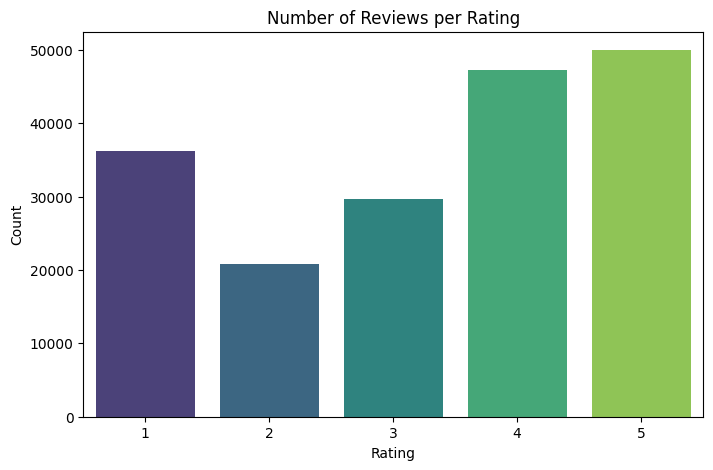

In [52]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Rating', data=df_final, palette='viridis')
plt.title("Number of Reviews per Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

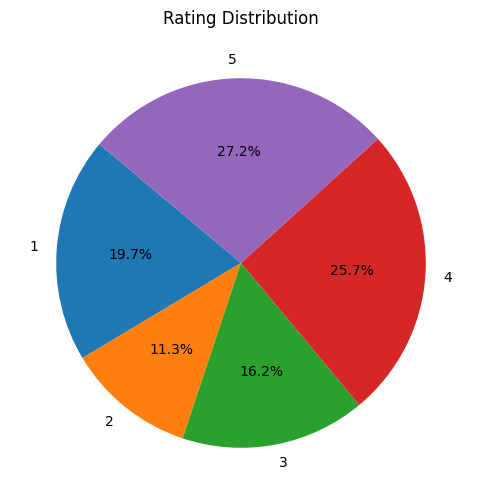

In [53]:
rating_counts = df_final['Rating'].value_counts().sort_index()
plt.figure(figsize=(6, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Rating Distribution")
plt.show()

In [54]:
df_final.to_csv("final_dataset.csv", encoding="utf-8-sig")

## Removing punctuations, URL,Emojies,special characters

In [55]:
df_final['Review'] = df_final['Review'].str.lower()
df_final['Review'] = df_final['Review'].str.replace(r'\[.*?\]', '', regex=True)

In [56]:
import re

def clean_text(text):
    text = str(text)
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # remove URLs
    text = re.sub(r'<.*?>', '', text)  # remove HTML tags
    text = re.sub(r'[\U00010000-\U0010ffff]', '', text)  # remove emojis
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra whitespace
    return text


In [57]:
df_final['Review']=df_final['Review'].apply(clean_text)

In [59]:
df_final.reset_index(drop=True, inplace=True)

In [60]:
df_final

,Rating,Review
0,5,i bought this to come with my capresso 114 mac...
1,4,sometimes you just dont have time to brew a go...
2,4,not as good as the chickpeas but i really like...
3,3,when i bought this 2 pack of colavita 101 oz t...
4,2,the extreme difficulty of adequately mixing th...
...,...,...
183943,3,i liked corn crunchems better before they refo...
183944,3,i was hoping for the ingredient that would mak...
183945,2,i am disappointed in this product after readin...
183946,2,these are to potato chips as pringles are to c...
